In [ ]:
import pandas as pd
import numpy as np
import random
import sys
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

#Clustering imports
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
#SKLEARN CLUSTERING TOOLS: https://scikit-learn.org/stable/modules/clustering.html


# IMPORTING .csv 

In [ ]:
#Loading Data from train.csv file
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv (r'/content/drive/MyDrive/ChexpertCSV/train.csv')
df = df.replace('Female',1)
df = df.replace('Male',-1)
df = df.replace(np.nan,0)
df = df.replace('Frontal',1)
df = df.replace('LL',-2)
df = df.replace('RL',-3)
df = df.replace('Lateral',-1)
df = df.replace('AP',1)
df = df.replace('PA',1)
df = df.replace('Unknown',0)
df = df.drop(labels=['Path','Sex','Age','Frontal/Lateral', 'AP/PA'], axis=1)
df.head()

scaler = StandardScaler()
model = scaler.fit(df)
data = model.transform(df)

S=df.shape
nrows = S[0]
ncols = S[1]
print (df)



Mounted at /content/drive
        No Finding  Enlarged Cardiomediastinum  Cardiomegaly  Lung Opacity  \
0              1.0                         0.0           0.0           0.0   
1              0.0                         0.0          -1.0           1.0   
2              0.0                         0.0           0.0           1.0   
3              0.0                         0.0           0.0           1.0   
4              0.0                         0.0           0.0           0.0   
...            ...                         ...           ...           ...   
223409         0.0                         0.0           0.0          -1.0   
223410         0.0                         0.0           0.0          -1.0   
223411         0.0                         0.0           0.0           0.0   
223412         0.0                         0.0           1.0           1.0   
223413         1.0                         0.0           0.0           0.0   

        Lung Lesion  Edema  Consolida

In [ ]:
# ------ VISUALIZE DATASET ------
#df.hist()


(223414, 14)

# GAUSSIAN MIXTURE

In [ ]:
# ------ GAUSSIAN MIXTURE CLUSTERING ------
percent = 0.25;#How much of the dataset do we consider for clustering
dfsample = df.sample(n=int(nrows*percent))#There are 223,414 rows we take percent of them

mixt = GaussianMixture(n_components=40, covariance_type='full', max_iter=10000, n_init=3).fit(dfsample)
labels = (df).columns

In [ ]:
List = []
percent = 0.25;#How much of the dataset do we consider for clustering
dfsample = df.sample(n=int(nrows*percent))#There are 223,414 rows we take percent of them

NCLUSTERS = [5, 10, 20, 40, 80, 120, 160, 190, 210, 230, 250]
for nclusters in NCLUSTERS:
  print("Round ", nclusters, " with max round being 120")
  mixt = GaussianMixture(n_components=nclusters, covariance_type='full', max_iter=10000, n_init=3).fit(dfsample)
  labels = (df).columns
  A=mixt.predict(dfsample)
  ind=0;
  S = [[] for i in range(np.max(A)+1)]
  for i in dfsample.iloc():
    c = A[ind]
    ind +=1
    S[c].append(i)

  liste = []
  for s in S:
    n = len(s);
    liste.append(n)
  List.append(liste.copy())

In [ ]:
PERCENT = [0.25,0.5,0.75]
LIST = [];
for percent in PERCENT:
  List = []
  #percent = 0.25;#How much of the dataset do we consider for clustering
  dfsample = df.sample(n=int(nrows*percent))#There are 223,414 rows we take percent of them

  NCLUSTERS = [5, 50, 100, 150, 175, 200, 225, 250]
  for nclusters in NCLUSTERS:
    print("Round ", nclusters, " with max round being 250 (percent =",percent,")")
    mixt = KMeans(n_clusters=nclusters, init='k-means++', random_state=0).fit(dfsample)
    labels = (df).columns
    A=mixt.predict(dfsample)
    ind=0;
    S = [[] for i in range(np.max(A)+1)]
    for i in dfsample.iloc():
      c = A[ind]
      ind +=1
      S[c].append(i)

    liste = []
    for s in S:
      n = len(s);
      liste.append(n)
    List.append(liste.copy())

  LIST += [List.copy()];

  '''
  Sizz = [0 for i in NCLUSTERS];
  ind = 0
  for L in List:
    for l in L:
      if l>(NCLUSTERS[ind]*0.2):
        Sizz[ind]+=1
    ind += 1

  
  plt.plot(NCLUSTERS,Sizz,NCLUSTERS,NCLUSTERS)
  plt.legend(["clusters of size > 0.2*uniform repartition", "all sizes"])
  plt.title("Clusters from Gaussian Mixture (%i%%  of the dataset)" % (percent*100))
  plt.xlabel("Number of clusters")
  plt.ylabel("Number of significant clusters")
  plt.show()



  #plt.plot(NCLUSTERS,[np.std(L) for L in List],NCLUSTERS,[np.mean(L) for L in List])
  #plt.show()
  #print(nrows*percent/320)

  '''


Round  5  with max round being 250 (percent = 0.25 )
Round  50  with max round being 250 (percent = 0.25 )
Round  100  with max round being 250 (percent = 0.25 )
Round  150  with max round being 250 (percent = 0.25 )
Round  175  with max round being 250 (percent = 0.25 )
Round  200  with max round being 250 (percent = 0.25 )
Round  225  with max round being 250 (percent = 0.25 )
Round  250  with max round being 250 (percent = 0.25 )
Round  5  with max round being 250 (percent = 0.5 )
Round  50  with max round being 250 (percent = 0.5 )
Round  100  with max round being 250 (percent = 0.5 )
Round  150  with max round being 250 (percent = 0.5 )
Round  175  with max round being 250 (percent = 0.5 )
Round  200  with max round being 250 (percent = 0.5 )
Round  225  with max round being 250 (percent = 0.5 )
Round  250  with max round being 250 (percent = 0.5 )
Round  5  with max round being 250 (percent = 0.75 )
Round  50  with max round being 250 (percent = 0.75 )
Round  100  with max round 

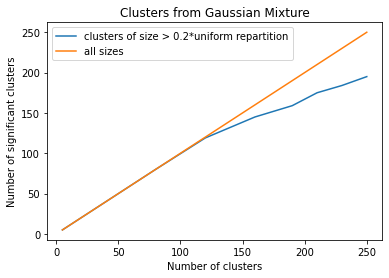

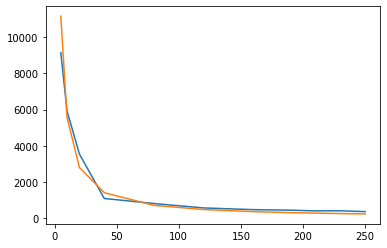

174.5421875


In [ ]:
#NCLUSTERS = [5, 10, 20, 40, 80, 120, 160, 190, 320]
Sizz = [0 for i in NCLUSTERS];
ind = 0
for L in List:
  for l in L:
    if l>(NCLUSTERS[ind]*0.2):
      Sizz[ind]+=1
  ind += 1

plt.plot(NCLUSTERS,Sizz,NCLUSTERS,NCLUSTERS)
plt.legend(["clusters of size > 0.2*uniform repartition", "all sizes"])
plt.title("Clusters from Kmeans considering")
plt.xlabel("Number of clusters")
plt.ylabel("Number of significant clusters")
plt.show()



plt.plot(NCLUSTERS,[np.std(L) for L in List],NCLUSTERS,[np.mean(L) for L in List])
plt.show()
print(nrows*percent/320)

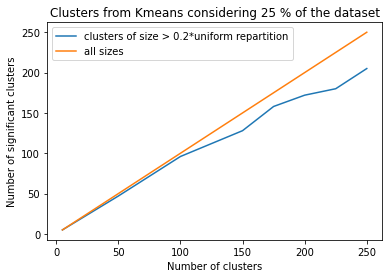

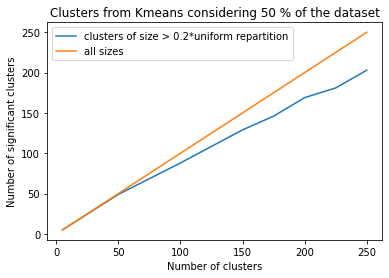

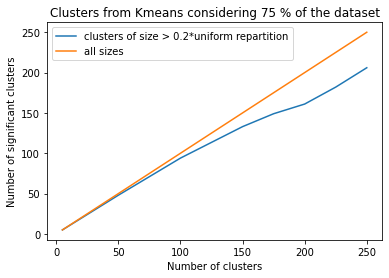

In [ ]:

SIZZ = []
indd = 0
for Llist in LIST:

  Sizz = [0 for i in NCLUSTERS];
  ind = 0
  #print('\n',indd)
  for L in Llist:
    for l in L:
      #print(223414*PERCENT[indd]/NCLUSTERS[ind]*0.2)
      if l>(223414*PERCENT[indd]/NCLUSTERS[ind]*0.2):
        Sizz[ind]+=1
    ind += 1
  SIZZ += [Sizz.copy()]

  plt.plot(NCLUSTERS,Sizz,NCLUSTERS,NCLUSTERS)
  plt.legend(["clusters of size > 0.2*uniform repartition", "all sizes"])
  plt.title("Clusters from Kmeans considering %i %% of the dataset" % (100*PERCENT[indd]))
  plt.xlabel("Number of clusters")
  plt.ylabel("Number of significant clusters")
  plt.show()
  indd += 1

AttributeError: ignored

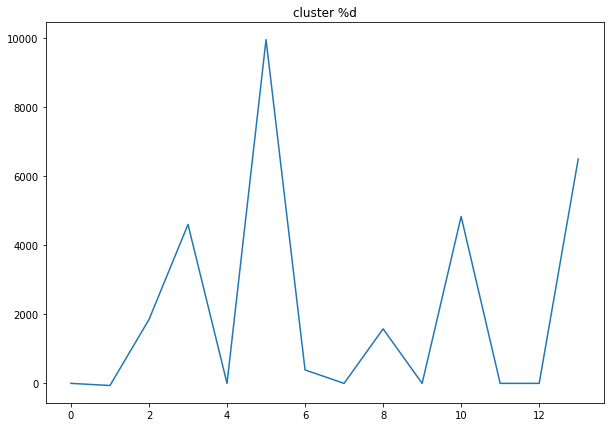

In [ ]:
# ------ VISUALIZE ------
#sns.scatterplot(data=dfsample, x=labels[2], y=labels[3])
#plt.show()
A=mixt.predict(dfsample)
ind=0;
S = [[] for i in range(np.max(A)+1)]
for i in dfsample.iloc():
  c = A[ind]
  ind +=1
  S[c].append(i)

fig, ax = plt.subplots(figsize =(10, 7))
ind = 0;
for s in S:
  ind += 1
  plt.plot(np.sum(s,0))
  plt.title("cluster %d",ind)
  plt.xlabel("Labels")
  plt.ylabel("cummulative values for all rows in the cluster")
  plt.show()   
  

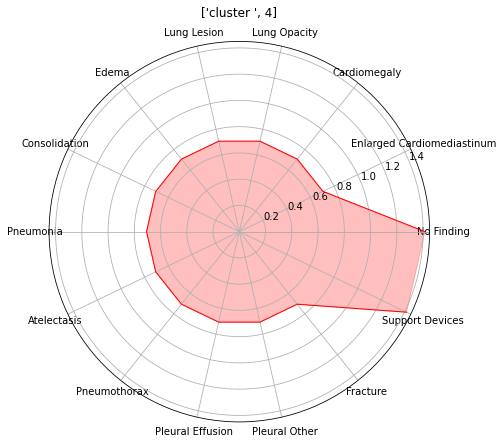

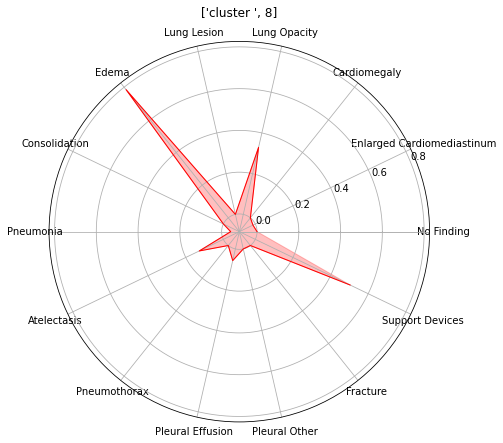

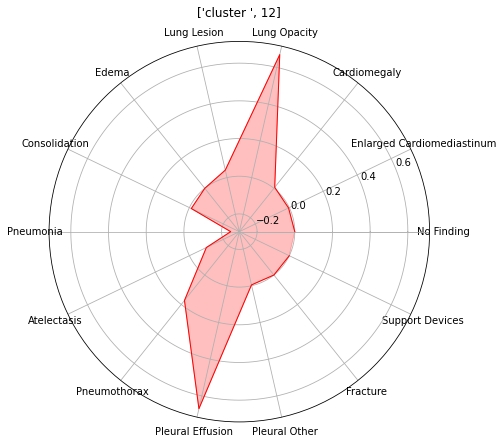

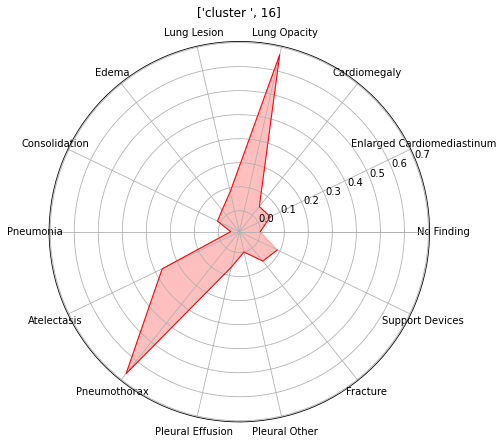

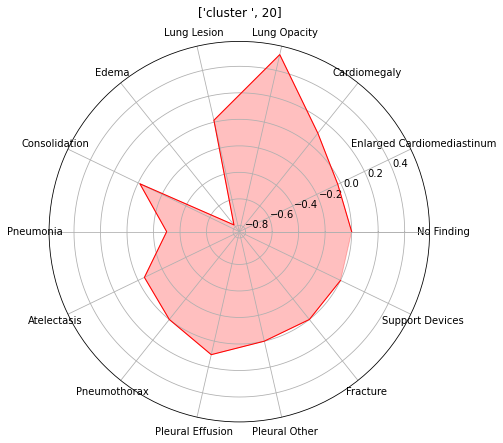

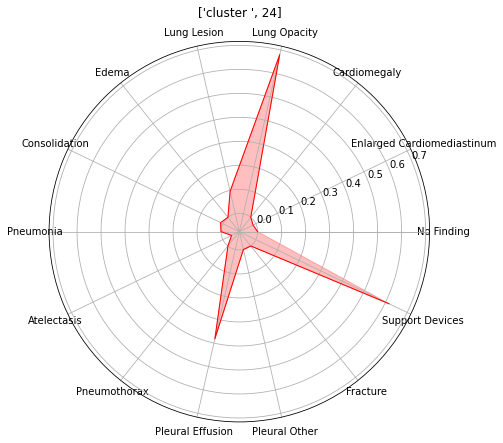

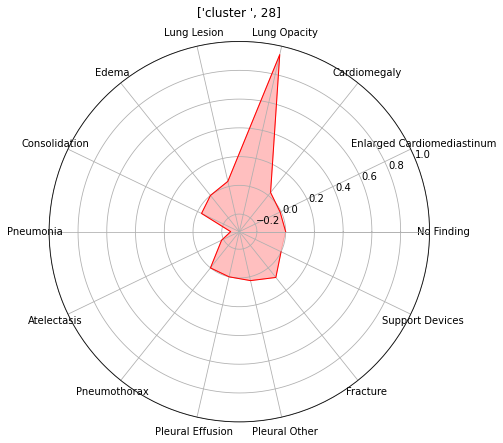

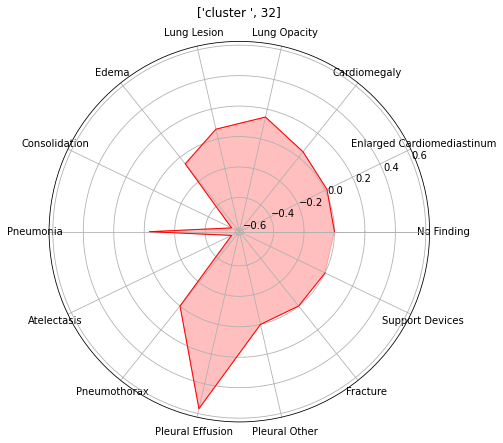

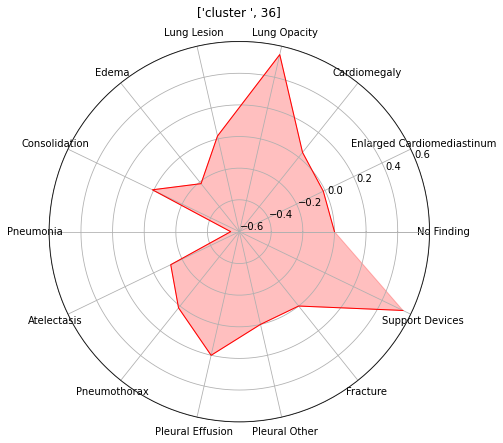

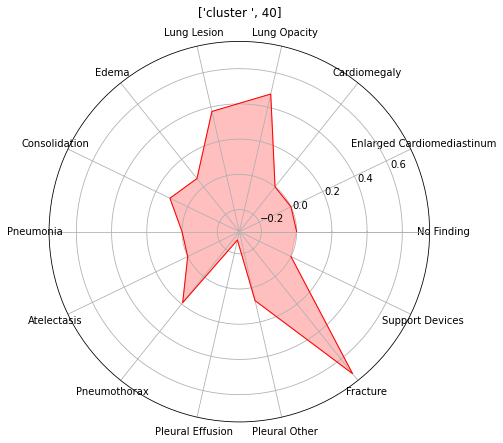

In [ ]:
A=mixt.predict(dfsample)
ind=0;
S = [[] for i in range(np.max(A)+1)]
for i in dfsample.iloc():
  c = A[ind]
  ind +=1
  S[c].append(i)

# Each attribute we'll plot in the radar chart.
labels = (df).columns


# Let's look at cluster...
ind = 0;
for s in S:
  ind += 1
  if ind%4==0:
    summ = np.sum(s,0)
    values = summ / np.linalg.norm(summ)

    # Number of variables we're plotting.
    num_vars = len(labels)-1

    # Split the circle into even parts and save the angles
    # so we know where to put each axis.
    angles = np.linspace(0, 2 * np.pi, num_vars+1, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop"
    # and append the start value to the end.
    values += values[:1]
    angles += angles[:1]

    # ax = plt.subplot(polar=True)
    #fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.set_xticks(angles)
    ax.set_xticklabels(labels.tolist())
    ax.set_rmin(-1)
    ax.set_rmax(1)
    # Draw the outline of our data.
    ax.plot(angles[:-1], values, color='red', linewidth=1)
    # Fill it in.
    ax.fill(angles[:-1], values, color='red', alpha=0.25)
    strg = ["cluster ",ind]
    plt.title(strg)

In [ ]:
print(labels.tolist())

['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']


# MINIBATCH K-MEANS

In [ ]:
# ------ MINIBATCH K-MEANS CLUSTERING ------
percent = 0.25;#How much of the dataset do we consider for clustering
dfsample = df.sample(n=int(nrows*percent))#There are 223,414 rows we take percent of them

miniKmeans = MiniBatchKMeans(n_clusters=100, init='k-means++', random_state=0).fit(dfsample)
labels = (dfsample).columns

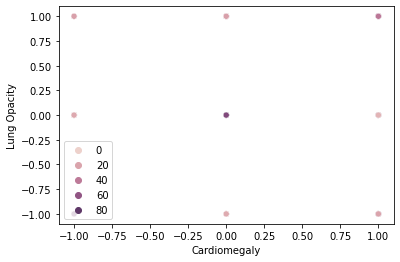

[[ 0.00000000e+00 -1.93482688e-02  5.29531568e-02 ... -4.52229338e-19
   2.54582485e-02  9.97963340e-01]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  7.48502994e-02 -3.74251497e-02 ...  2.24550898e-02
   4.26646707e-02  1.00000000e+00]
 ...
 [ 0.00000000e+00  3.41880342e-02  1.00000000e+00 ...  1.49572650e-02
   2.35042735e-02 -8.54700855e-03]
 [ 0.00000000e+00 -4.29752066e-02  9.91735537e-03 ...  1.65289256e-02
   1.65289256e-03  2.28099174e-01]
 [ 0.00000000e+00  1.00000000e+00 -4.66867470e-02 ...  1.50602410e-02
  -1.50602410e-02 -7.53012048e-03]]


In [ ]:
# ------ VISUALIZE ------
sns.scatterplot(data=dfsample, x=labels[2], y=labels[3], hue=miniKmeans.labels_)
plt.show()
print(miniKmeans.cluster_centers_)

# K-MEANS

In [ ]:
# ------ K-MEANS CLUSTERING ------
percent = 0.25;#How much of the dataset do we consider for clustering
dfsample = df.sample(n=int(nrows*percent))#There are 223,414 rows we take percent of them

kmeans = KMeans(n_clusters=100, init='k-means++', random_state=0).fit(dfsample.drop('Path', axis=1))
labels = labels = (df).columns

In [ ]:
# ------ VISUALIZE ------
sns.scatterplot(data=df, x=labels[2], y=labels[3], hue=kmeans.labels_)
plt.show()

# SOME USELESS STUFF

In [ ]:
from numpy.core.fromnumeric import mean
def euclid_dist(vect1, vect2):
  dist = 0;
  for i in range(len(vect1)):
    dist += (vect1[i]-vect2[i])**2;
  return np.sqrt(dist)

def indmin(L):
  ind=0;
  value = L[0];
  cind=0
  for i in L:
    if i<value:
      value=i
      ind = cind
    cind+=1
  return ind

def closest_centroid(vect, centroids):
  dist = 0;
  DIST = [];
  for i in range(np.size(centroids,1)):
    DIST.append(euclid_dist(vect,centroids[:,i]))
  return indmin(DIST)

def update_centroids(clouds,centroids):
  for i in range(np.size(centroids,1)):
    if clouds[i]!=[]:
      vect = np.sum(clouds[i],axis=0)/np.size(clouds[i],0)
      #print(vect)
      centroids[:,i]=vect
  return centroids

def visualize(clouds, centroids,centroidsOldviz):
  K = np.size(clouds,0)
  colors =  ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]) for k in range(K) ];
  for i in range(K):
    c = np.array(clouds[i])
    if c!=[]:
    #print(np.size(c))
    #print(c[:,0], np.size(c[:,0]))
    #print(c[:,1], np.size(c[:,1]))
      plt.scatter(c[:,0], c[:,1])
  plt.scatter(centroids[0, :], centroids[1, :], c='#000000', marker='X')
  #plt.scatter(centroidsOldviz[0, :], centroidsOldviz[1, :], c='#000000', marker='H')
  #print(centroids)
  plt.show()
  return

def genereData(K,N):
  data = []
  mu = np.random.randint(-100,101,size=(1,K))
  sigma = 10*np.ones((1,K))
  for i in range(K):
    for j in range(N):
      xy = sigma[0][i] * np.random.randn(1,2) + mu[0][i];
      data.append(xy[0])
  data=np.array(data)
  data = (data-np.mean(data))/np.max(data);
  return data


#data = genereData(4,20)
n_clusters = 10;
centroids = 0.001*np.random.randn(np.size(data,1),n_clusters)

MaxIter = 100;
eps = 0.001
cycle = 0;
centroidsOldviz = centroids.copy()

while cycle<MaxIter:
  #Loading bar
  if cycle%10==0:
       print("\n\nCycle",cycle)
       print(" 0 %")

  centroidsOld = centroids.copy()
  clouds = [[] for i in range(np.size(data,0))]
  ind=0
  for i in data:
    ind += 1
    if ind%10000==0:
      sys.stdout.write("\x1b[1A") 
      sys.stdout.write("\x1b[2K") 
      print("",int(ind/np.size(data,0)),"%")
  
    k = closest_centroid(i,centroids);
    clouds[k].append(i)
    centroids = update_centroids(clouds,centroids)
  
  if cycle%20 == 0:
    visualize(clouds,centroids,centroidsOldviz)
    centroidsOldviz = centroids.copy()
  cycle +=1
  if np.mean(np.square(np.subtract(centroidsOld,centroids)))<eps:
    break
print(cycle)



Cycle 0
 0 %


KeyboardInterrupt: ignored